In [1]:
!nvidia-smi

Wed Oct 29 10:51:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# 下載 YOLOv5 原始碼
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# 安裝依賴套件
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17646, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 17646 (delta 13), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17646/17646), 16.99 MiB | 6.52 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.5 MB/s eta 0:00:00


In [3]:
!cat data/coco128.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# COCO128 dataset https://www.kaggle.com/datasets/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128 # dataset root dir
train: images/train2017 # train images (relative to 'path') 128 images
val: images/train2017 # val images (relative to 'path') 128 images
test: # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpac

In [4]:
!python train.py --data data/coco128.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --epochs 3 --batch-size 16

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-29 10:56:15.879238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761735375.900474    1857 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761735375.906341    1857 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [5]:
!ls runs/train/exp

confusion_matrix.png				    results.png
events.out.tfevents.1761735385.1dc1ee7c9ef6.1857.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [6]:
!python detect.py --weights runs/train/exp/weights/best.pt --source data/images


detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 32.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 32.8ms
Speed: 0.5ms pre-process, 32.4ms inference, 34.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


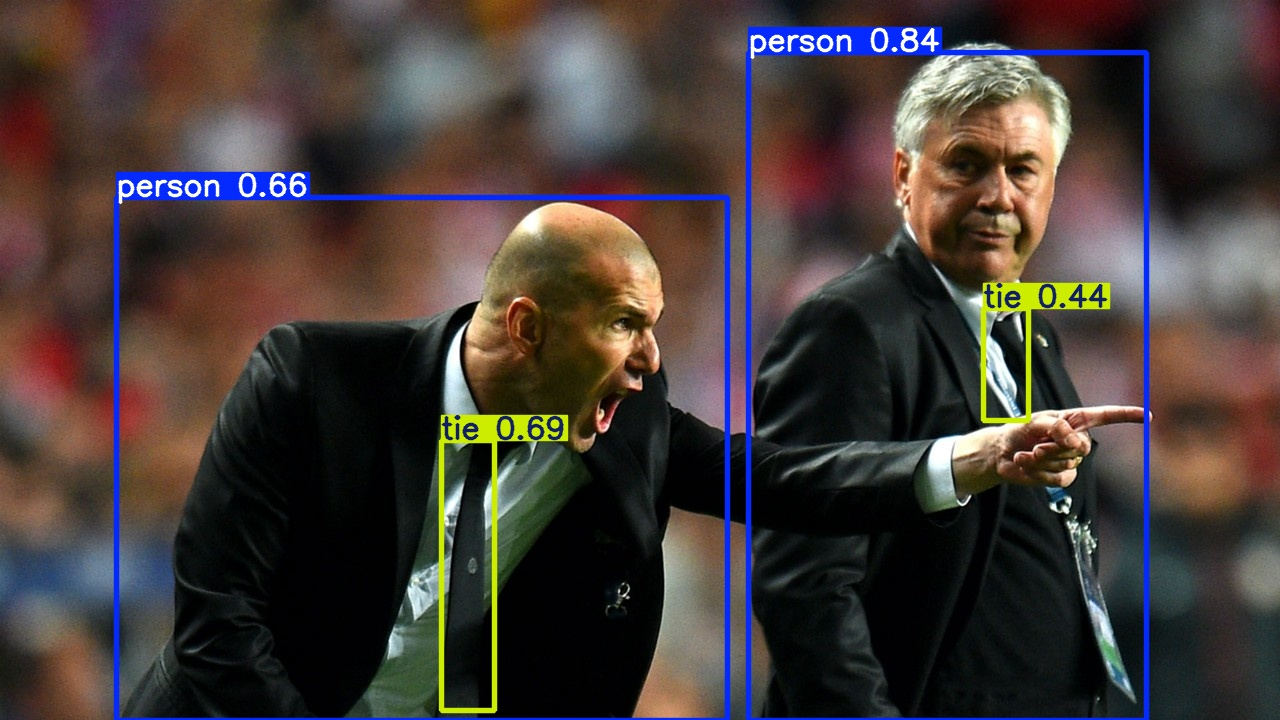

In [7]:
from IPython.display import Image
Image(filename='runs/detect/exp/zidane.jpg')
